# 1. Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading Dataset

In [2]:
data = pd.read_csv("heart.csv")
data.head()
     

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# 3. Data Cleaning and Preprocessing


In [3]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Replacing the column names of the dataset with their actual names.
Converting the numeric features to categorical features.

In [4]:
# Renaming columns
data.columns = [
    'age', 'sex', 'chest pain type', 'resting blood pressure', 'cholesterol',
    'fasting blood sugar', 'rest ecg', 'max heart rate achieved',
    'exercise induced angina', 'oldpeak', 'st slope', 'no. of vessels colored',
    'thalassemia', 'target'
]

# Updating categorical columns with descriptive labels
data.loc[data['chest pain type'] == 0, 'chest pain type'] = 'typical angina'
data.loc[data['chest pain type'] == 1, 'chest pain type'] = 'atypical angina'
data.loc[data['chest pain type'] == 2, 'chest pain type'] = 'non-anginal pain'
data.loc[data['chest pain type'] == 3, 'chest pain type'] = 'asymptomatic'

data.loc[data['rest ecg'] == 0, 'rest ecg'] = 'normal'
data.loc[data['rest ecg'] == 1, 'rest ecg'] = 'ST-T wave abnormality'
data.loc[data['rest ecg'] == 2, 'rest ecg'] = 'left ventricular hypertrophy'

data.loc[data['st slope'] == 0, 'st slope'] = 'normal'
data.loc[data['st slope'] == 1, 'st slope'] = 'upsloping'
data.loc[data['st slope'] == 2, 'st slope'] = 'flat'
data.loc[data['st slope'] == 3, 'st slope'] = 'downsloping'

data.loc[data['thalassemia'] == 0, 'thalassemia'] = 'no thalassemia'
data.loc[data['thalassemia'] == 1, 'thalassemia'] = 'normal thalassemia'
data.loc[data['thalassemia'] == 2, 'thalassemia'] = 'fixed defect thalassemia'
data.loc[data['thalassemia'] == 3, 'thalassemia'] = 'reversible defect thalassemia'

data.loc[data['fasting blood sugar'] == 0, 'fasting blood sugar'] = 'Fasting Blood Sugar <= 120'
data.loc[data['fasting blood sugar'] == 1, 'fasting blood sugar'] = 'Fasting Blood Sugar > 120'

data.loc[data['exercise induced angina'] == 0, 'exercise induced angina'] = 'no exercise induced angina'
data.loc[data['exercise induced angina'] == 1, 'exercise induced angina'] = 'exercise induced angina'

data.loc[data['target'] == 0, 'target'] = 'healthy'
data.loc[data['target'] == 1, 'target'] = 'heart disease'

data.loc[data['sex'] == 0, 'sex'] = 'female'
data.loc[data['sex'] == 1, 'sex'] = 'male'

data


,age,sex,chest pain type,resting blood pressure,cholesterol,fasting blood sugar,rest ecg,max heart rate achieved,exercise induced angina,oldpeak,st slope,no. of vessels colored,thalassemia,target
0,52,male,typical angina,125,212,Fasting Blood Sugar <= 120,ST-T wave abnormality,168,no exercise induced angina,1.0,flat,2,reversible defect thalassemia,healthy
1,53,male,typical angina,140,203,Fasting Blood Sugar > 120,normal,155,exercise induced angina,3.1,normal,0,reversible defect thalassemia,healthy
2,70,male,typical angina,145,174,Fasting Blood Sugar <= 120,ST-T wave abnormality,125,exercise induced angina,2.6,normal,0,reversible defect thalassemia,healthy
3,61,male,typical angina,148,203,Fasting Blood Sugar <= 120,ST-T wave abnormality,161,no exercise induced angina,0.0,flat,1,reversible defect thalassemia,healthy
4,62,female,typical angina,138,294,Fasting Blood Sugar > 120,ST-T wave abnormality,106,no exercise induced angina,1.9,upsloping,3,fixed defect thalassemia,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,male,atypical angina,140,221,Fasting Blood Sugar <= 120,ST-T wave abnormality,164,exercise induced angina,0.0,flat,0,fixed defect thalassemia,heart disease
1021,60,male,typical angina,125,258,Fasting Blood Sugar <= 120,normal,141,exercise induced angina,2.8,upsloping,1,reversible defect thalassemia,healthy
1022,47,male,typical angina,110,275,Fasting Blood Sugar <= 120,normal,118,exercise induced angina,1.0,upsloping,1,fixed defect thalassemia,healthy
1023,50,female,typical angina,110,254,Fasting Blood Sugar <= 120,normal,159,no exercise induced angina,0.0,flat,0,fixed defect thalassemia,heart disease


In [5]:
data.isnull().sum()

age                        0
sex                        0
chest pain type            0
resting blood pressure     0
cholesterol                0
fasting blood sugar        0
rest ecg                   0
max heart rate achieved    0
exercise induced angina    0
oldpeak                    0
st slope                   0
no. of vessels colored     0
thalassemia                0
target                     0
dtype: int64

Describing numeric features of the dataset.

In [6]:
data.describe(include =[np.number])

,age,resting blood pressure,cholesterol,max heart rate achieved,oldpeak,no. of vessels colored
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.754146
std,9.072290,17.516718,51.59251,23.005724,1.175053,1.030798
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,0.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,4.000000


Describing categorical features of the dataset.

In [7]:
data.describe(include=[object])


,sex,chest pain type,fasting blood sugar,rest ecg,exercise induced angina,st slope,thalassemia,target
count,1025,1025,1025,1025,1025,1025,1025,1025
unique,2,4,2,3,2,3,4,2
top,male,typical angina,Fasting Blood Sugar <= 120,ST-T wave abnormality,no exercise induced angina,upsloping,fixed defect thalassemia,heart disease
freq,713,497,872,513,680,482,544,526


# Data Visualization

heart disease    526
healthy          499
Name: target, dtype: int64


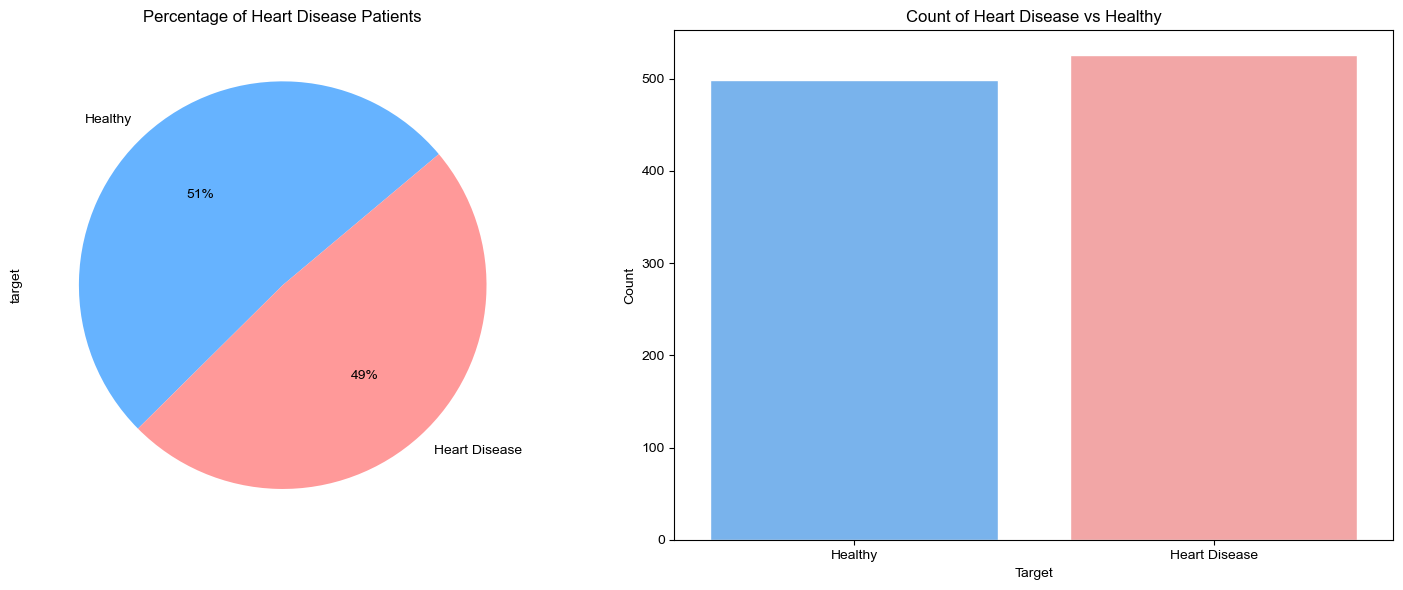

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print target value counts to confirm the distribution
print(data.target.value_counts())

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Pie chart for target (Heart Disease vs Healthy)
data['target'].value_counts().plot.pie(
    autopct="%1.0f%%",
    labels=["Healthy", "Heart Disease"],  # Properly labeled based on value counts
    startangle=40,
    ax=ax1,
    colors=["#66b3ff", "#ff9999"]  # Blue for Healthy, Red for Heart Disease
)
ax1.set_title('Percentage of Heart Disease Patients')

# Count plot for target (Heart Disease vs Healthy)
sns.set_style('whitegrid')
sns.countplot(x='target', data=data, ax=ax2, palette=["#66b3ff", "#ff9999"])  # Blue for Healthy, Red for Heart Disease
ax2.set_title('Count of Heart Disease vs Healthy')
ax2.set_xlabel('Target')
ax2.set_ylabel('Count')

# Set x-tick labels correctly to reflect the categories
ax2.set_xticklabels(['Healthy', 'Heart Disease'])

# Adjust layout and display
plt.tight_layout()
plt.show()


In [9]:
print(data['sex'].value_counts())


male      713
female    312
Name: sex, dtype: int64


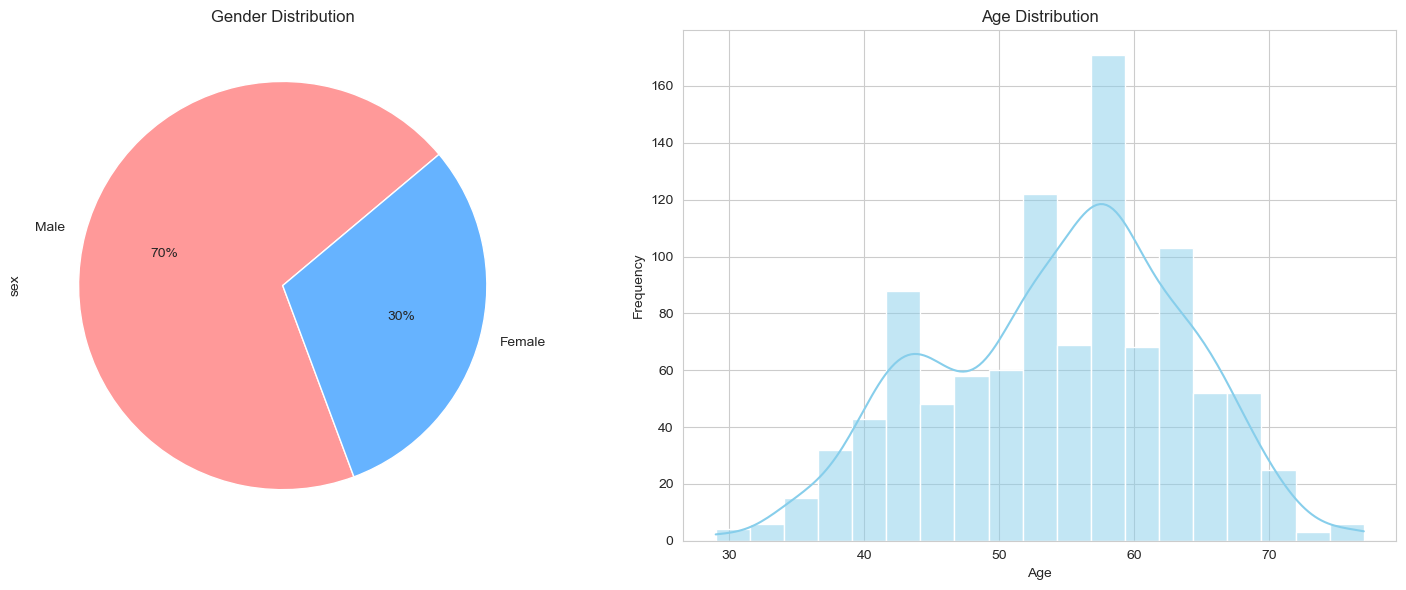

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot Pie chart for Gender (sex)
data['sex'].value_counts().plot.pie(
    autopct="%1.0f%%",
    labels=["Male", "Female"],  # Correctly ordered based on the counts
    startangle=40,
    ax=ax1,
    colors=["#ff9999", "#66b3ff"]
)
ax1.set_title('Gender Distribution')

# Plot Distribution plot for Age
sns.histplot(data['age'], kde=True, color="skyblue", ax=ax2)
ax2.set_title('Age Distribution')
ax2.set_xlabel('Age')
ax2.set_ylabel('Frequency')

# Adjust layout and display
plt.tight_layout()
plt.show()


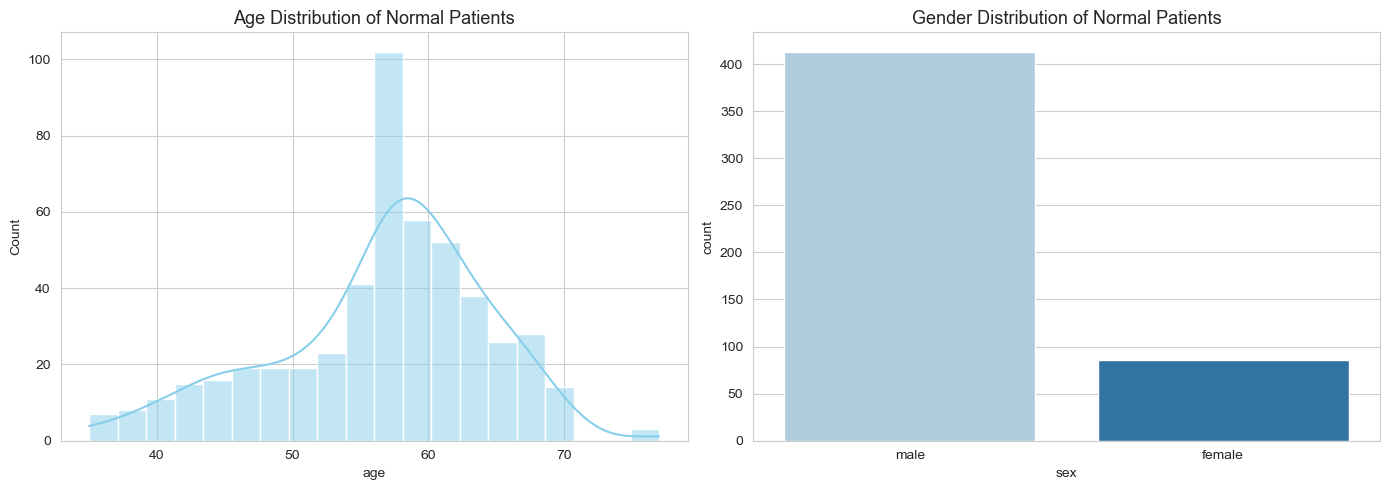

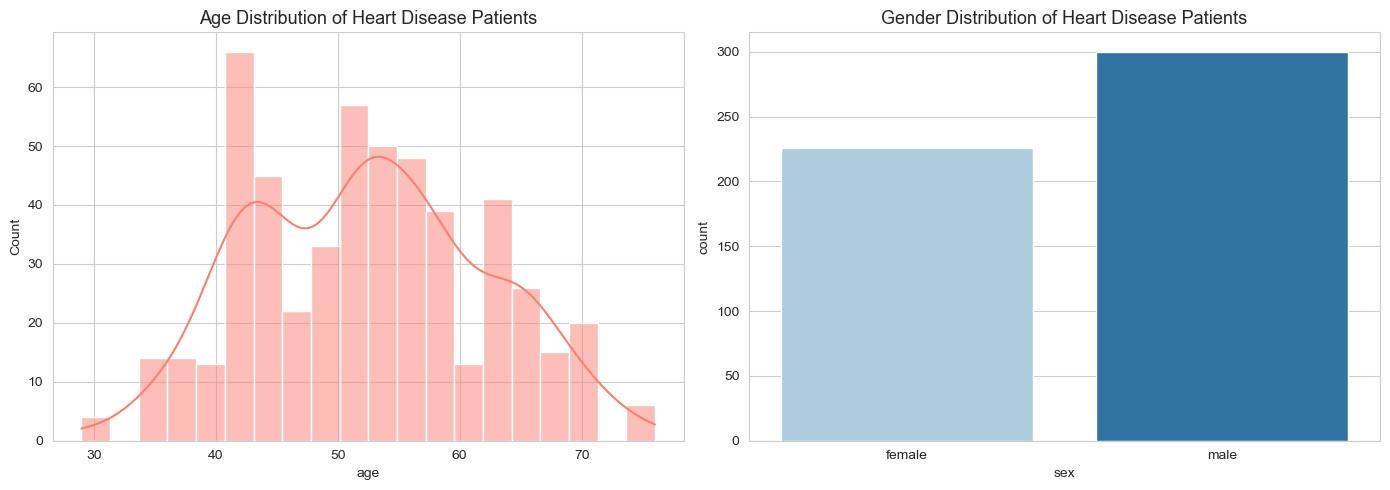

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate the data into normal and heart disease patients
t0 = data[data['target'] == "healthy"]
t1 = data[data['target'] == "heart disease"]

# Plot Age Distribution and Gender Distribution for Normal Patients
fig = plt.figure(figsize=(14, 5))

# Age Distribution for Normal Patients
ax1 = plt.subplot2grid((1, 2), (0, 0))
sns.histplot(t0['age'], kde=True, color="skyblue", bins=20)
plt.title('Age Distribution of Normal Patients', fontsize=13)

# Gender Distribution for Normal Patients
ax1 = plt.subplot2grid((1, 2), (0, 1))
sns.countplot(x='sex', data=t0, palette="Paired")
plt.title('Gender Distribution of Normal Patients', fontsize=13)

plt.tight_layout()
plt.show()

# Plot Age Distribution and Gender Distribution for Heart Disease Patients
fig = plt.figure(figsize=(14, 5))

# Age Distribution for Heart Disease Patients
ax1 = plt.subplot2grid((1, 2), (0, 0))
sns.histplot(t1['age'], kde=True, color="salmon", bins=20)
plt.title('Age Distribution of Heart Disease Patients', fontsize=13)

# Gender Distribution for Heart Disease Patients
ax1 = plt.subplot2grid((1, 2), (0, 1))
sns.countplot(x='sex', data=t1, palette="Paired")
plt.title('Gender Distribution of Heart Disease Patients', fontsize=13)

plt.tight_layout()
plt.show()


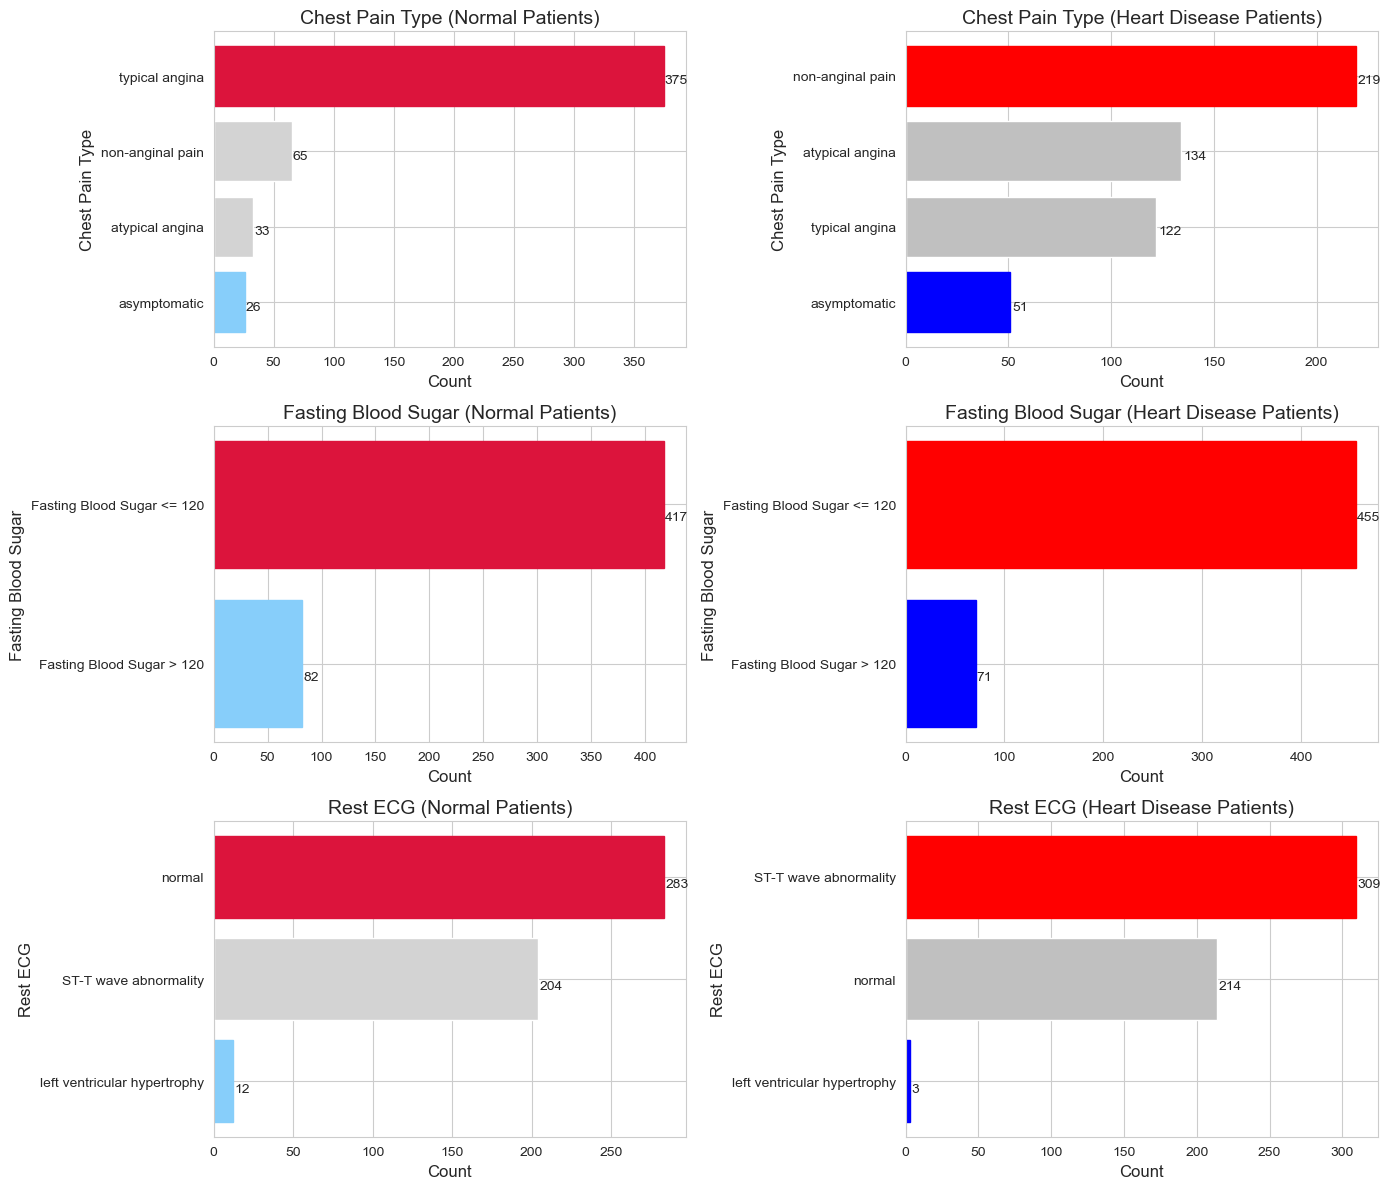

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data based on target (normal vs heart disease)
t0 = data[data['target'] == "healthy"]  # Normal patients
t1 = data[data['target'] == "heart disease"]  # Heart disease patients

# Set up the figure with multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))

# Chest Pain Type Distribution for Normal Patients
cpt = t0['chest pain type'].value_counts().sort_values(ascending=False).reset_index()
ax = axes[0, 0]
pc = ax.barh(cpt.iloc[:, 0], cpt.iloc[:, 1], color='lightgray')
pc[0].set_color('crimson')
pc[3].set_color('lightskyblue')

ax.set_title('Chest Pain Type (Normal Patients)', fontsize=14)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Chest Pain Type', fontsize=12)
ax.invert_yaxis()

# Adding counts on the bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round(i.get_width(), 2)), fontsize=10)

# Chest Pain Type Distribution for Heart Disease Patients
cpt1 = t1['chest pain type'].value_counts().sort_values(ascending=False).reset_index()
ax = axes[0, 1]
pc1 = ax.barh(cpt1.iloc[:, 0], cpt1.iloc[:, 1], color='silver')
pc1[0].set_color('red')
pc1[3].set_color('blue')

ax.set_title('Chest Pain Type (Heart Disease Patients)', fontsize=14)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Chest Pain Type', fontsize=12)
ax.invert_yaxis()

# Adding counts on the bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round(i.get_width(), 2)), fontsize=10)

# Fasting Blood Sugar Distribution for Normal Patients
fbs = t0['fasting blood sugar'].value_counts().sort_values(ascending=False).reset_index()
ax = axes[1, 0]
pfbs = ax.barh(fbs.iloc[:, 0], fbs.iloc[:, 1], color='lightgray')
pfbs[0].set_color('crimson')
pfbs[1].set_color('lightskyblue')

ax.set_title('Fasting Blood Sugar (Normal Patients)', fontsize=14)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Fasting Blood Sugar', fontsize=12)
ax.invert_yaxis()

# Adding counts on the bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round(i.get_width(), 2)), fontsize=10)

# Fasting Blood Sugar Distribution for Heart Disease Patients
fbs1 = t1['fasting blood sugar'].value_counts().sort_values(ascending=False).reset_index()
ax = axes[1, 1]
pfbs1 = ax.barh(fbs1.iloc[:, 0], fbs1.iloc[:, 1], color='silver')
pfbs1[0].set_color('red')
pfbs1[1].set_color('blue')

ax.set_title('Fasting Blood Sugar (Heart Disease Patients)', fontsize=14)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Fasting Blood Sugar', fontsize=12)
ax.invert_yaxis()

# Adding counts on the bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round(i.get_width(), 2)), fontsize=10)

# Rest ECG Distribution for Normal Patients
restecg = t0['rest ecg'].value_counts().sort_values(ascending=False).reset_index()
ax = axes[2, 0]
prestecg = ax.barh(restecg.iloc[:, 0], restecg.iloc[:, 1], color='lightgray')
prestecg[0].set_color('crimson')
prestecg[2].set_color('lightskyblue')

ax.set_title('Rest ECG (Normal Patients)', fontsize=14)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Rest ECG', fontsize=12)
ax.invert_yaxis()

# Adding counts on the bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round(i.get_width(), 2)), fontsize=10)

# Rest ECG Distribution for Heart Disease Patients
restecg1 = t1['rest ecg'].value_counts().sort_values(ascending=False).reset_index()
ax = axes[2, 1]
prestecg1 = ax.barh(restecg1.iloc[:, 0], restecg1.iloc[:, 1], color='silver')
prestecg1[0].set_color('red')
prestecg1[2].set_color('blue')

ax.set_title('Rest ECG (Heart Disease Patients)', fontsize=14)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Rest ECG', fontsize=12)
ax.invert_yaxis()

# Adding counts on the bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round(i.get_width(), 2)), fontsize=10)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


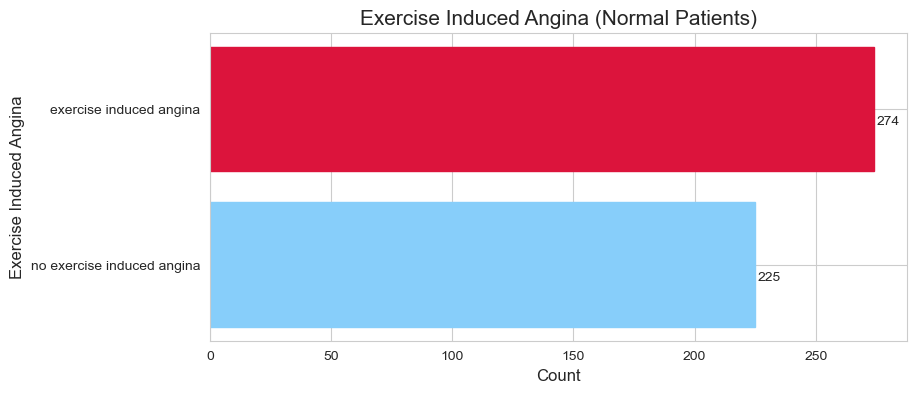

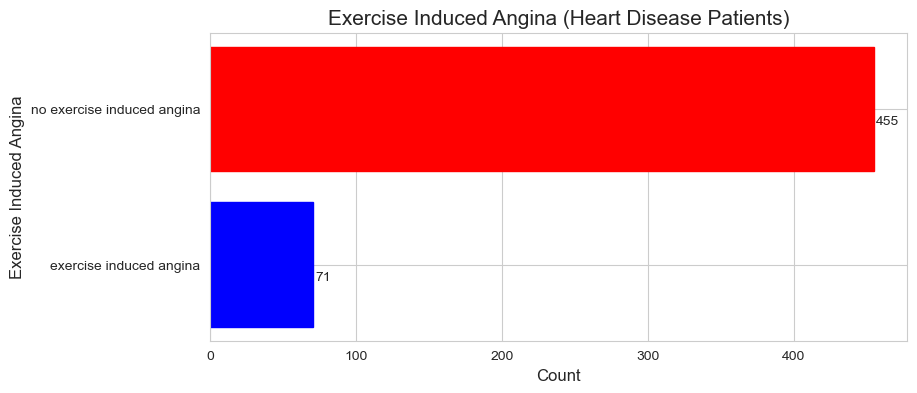

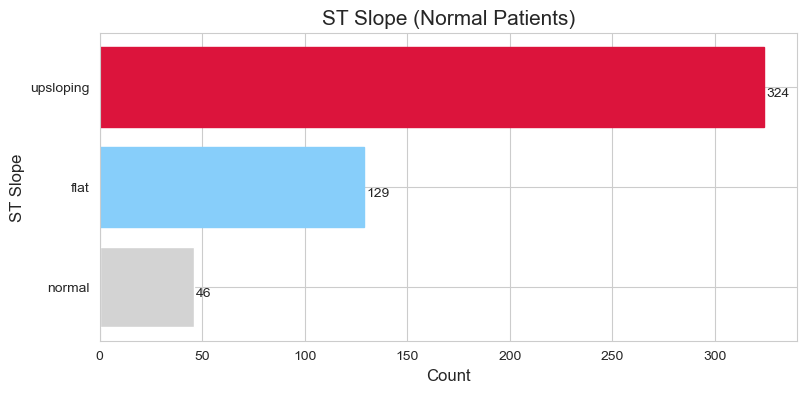

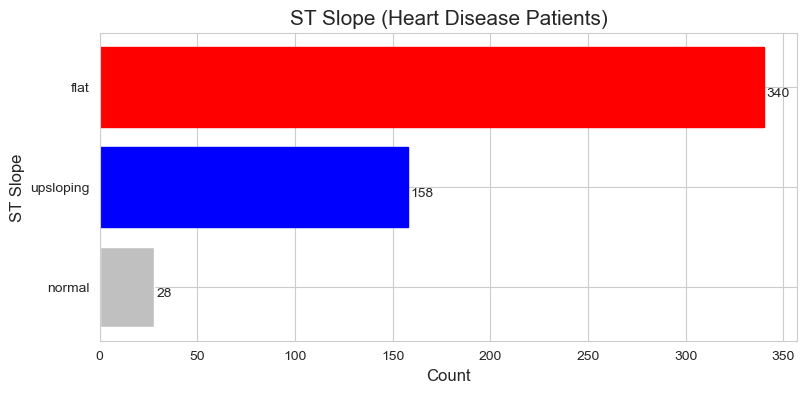

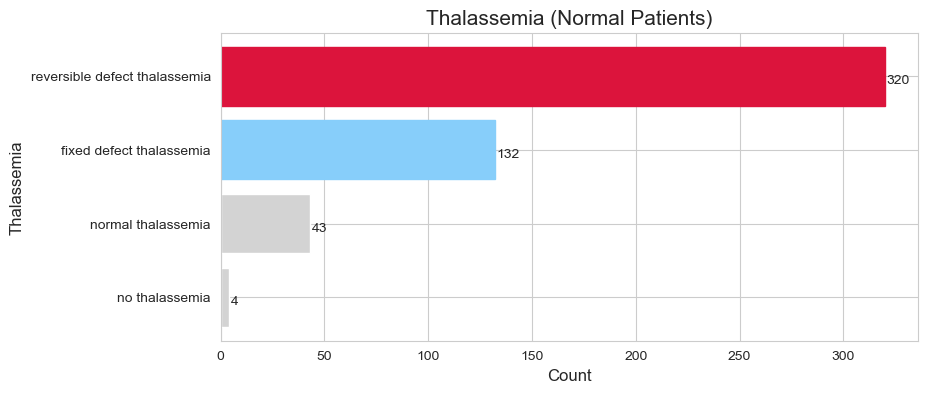

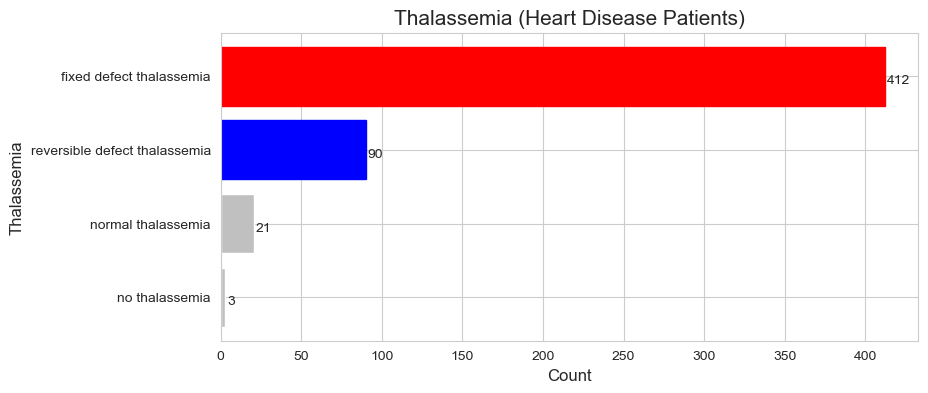

In [13]:
import matplotlib.pyplot as plt

# Exercise Induced Angina Feature
fig, ax = plt.subplots(figsize=(9, 4))
eia = t0['exercise induced angina'].value_counts().sort_values(ascending=False).reset_index()
pc = ax.barh(eia.iloc[:, 0], eia.iloc[:, 1], color='lightgray')
pc[0].set_color('crimson')
pc[1].set_color('lightskyblue')

ax.set_title('Exercise Induced Angina (Normal Patients)', fontsize=15)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Exercise Induced Angina', fontsize=12)
ax.invert_yaxis()

for i in ax.patches:
    ax.text(i.get_width() + 1, i.get_y() + 0.5, str(round(i.get_width(), 2)), fontsize=10)
plt.show()

fig, ax = plt.subplots(figsize=(9, 4))
eia1 = t1['exercise induced angina'].value_counts().sort_values(ascending=False).reset_index()
pc1 = ax.barh(eia1.iloc[:, 0], eia1.iloc[:, 1], color='silver')
pc1[0].set_color('red')
pc1[1].set_color('blue')

ax.set_title('Exercise Induced Angina (Heart Disease Patients)', fontsize=15)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Exercise Induced Angina', fontsize=12)
ax.invert_yaxis()

for i in ax.patches:
    ax.text(i.get_width() + 1, i.get_y() + 0.5, str(round(i.get_width(), 2)), fontsize=10)
plt.show()

# ST Slope Feature
fig, ax = plt.subplots(figsize=(9, 4))
sts = t0['st slope'].value_counts().sort_values(ascending=False).reset_index()
pc = ax.barh(sts.iloc[:, 0], sts.iloc[:, 1], color='lightgray')
pc[0].set_color('crimson')
pc[1].set_color('lightskyblue')

ax.set_title('ST Slope (Normal Patients)', fontsize=15)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('ST Slope', fontsize=12)
ax.invert_yaxis()

for i in ax.patches:
    ax.text(i.get_width() + 1, i.get_y() + 0.5, str(round(i.get_width(), 2)), fontsize=10)
plt.show()

fig, ax = plt.subplots(figsize=(9, 4))
sts1 = t1['st slope'].value_counts().sort_values(ascending=False).reset_index()
pc1 = ax.barh(sts1.iloc[:, 0], sts1.iloc[:, 1], color='silver')
pc1[0].set_color('red')
pc1[1].set_color('blue')

ax.set_title('ST Slope (Heart Disease Patients)', fontsize=15)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('ST Slope', fontsize=12)
ax.invert_yaxis()

for i in ax.patches:
    ax.text(i.get_width() + 1, i.get_y() + 0.5, str(round(i.get_width(), 2)), fontsize=10)
plt.show()

# Thalassemia Feature
fig, ax = plt.subplots(figsize=(9, 4))
thal = t0['thalassemia'].value_counts().sort_values(ascending=False).reset_index()
pc = ax.barh(thal.iloc[:, 0], thal.iloc[:, 1], color='lightgray')
pc[0].set_color('crimson')
pc[1].set_color('lightskyblue')

ax.set_title('Thalassemia (Normal Patients)', fontsize=15)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Thalassemia', fontsize=12)
ax.invert_yaxis()

for i in ax.patches:
    ax.text(i.get_width() + 1, i.get_y() + 0.5, str(round(i.get_width(), 2)), fontsize=10)
plt.show()

fig, ax = plt.subplots(figsize=(9, 4))
thal1 = t1['thalassemia'].value_counts().sort_values(ascending=False).reset_index()
pc1 = ax.barh(thal1.iloc[:, 0], thal1.iloc[:, 1], color='silver')
pc1[0].set_color('red')
pc1[1].set_color('blue')

ax.set_title('Thalassemia (Heart Disease Patients)', fontsize=15)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Thalassemia', fontsize=12)
ax.invert_yaxis()

for i in ax.patches:
    ax.text(i.get_width() + 1, i.get_y() + 0.5, str(round(i.get_width(), 2)), fontsize=10)
plt.show()


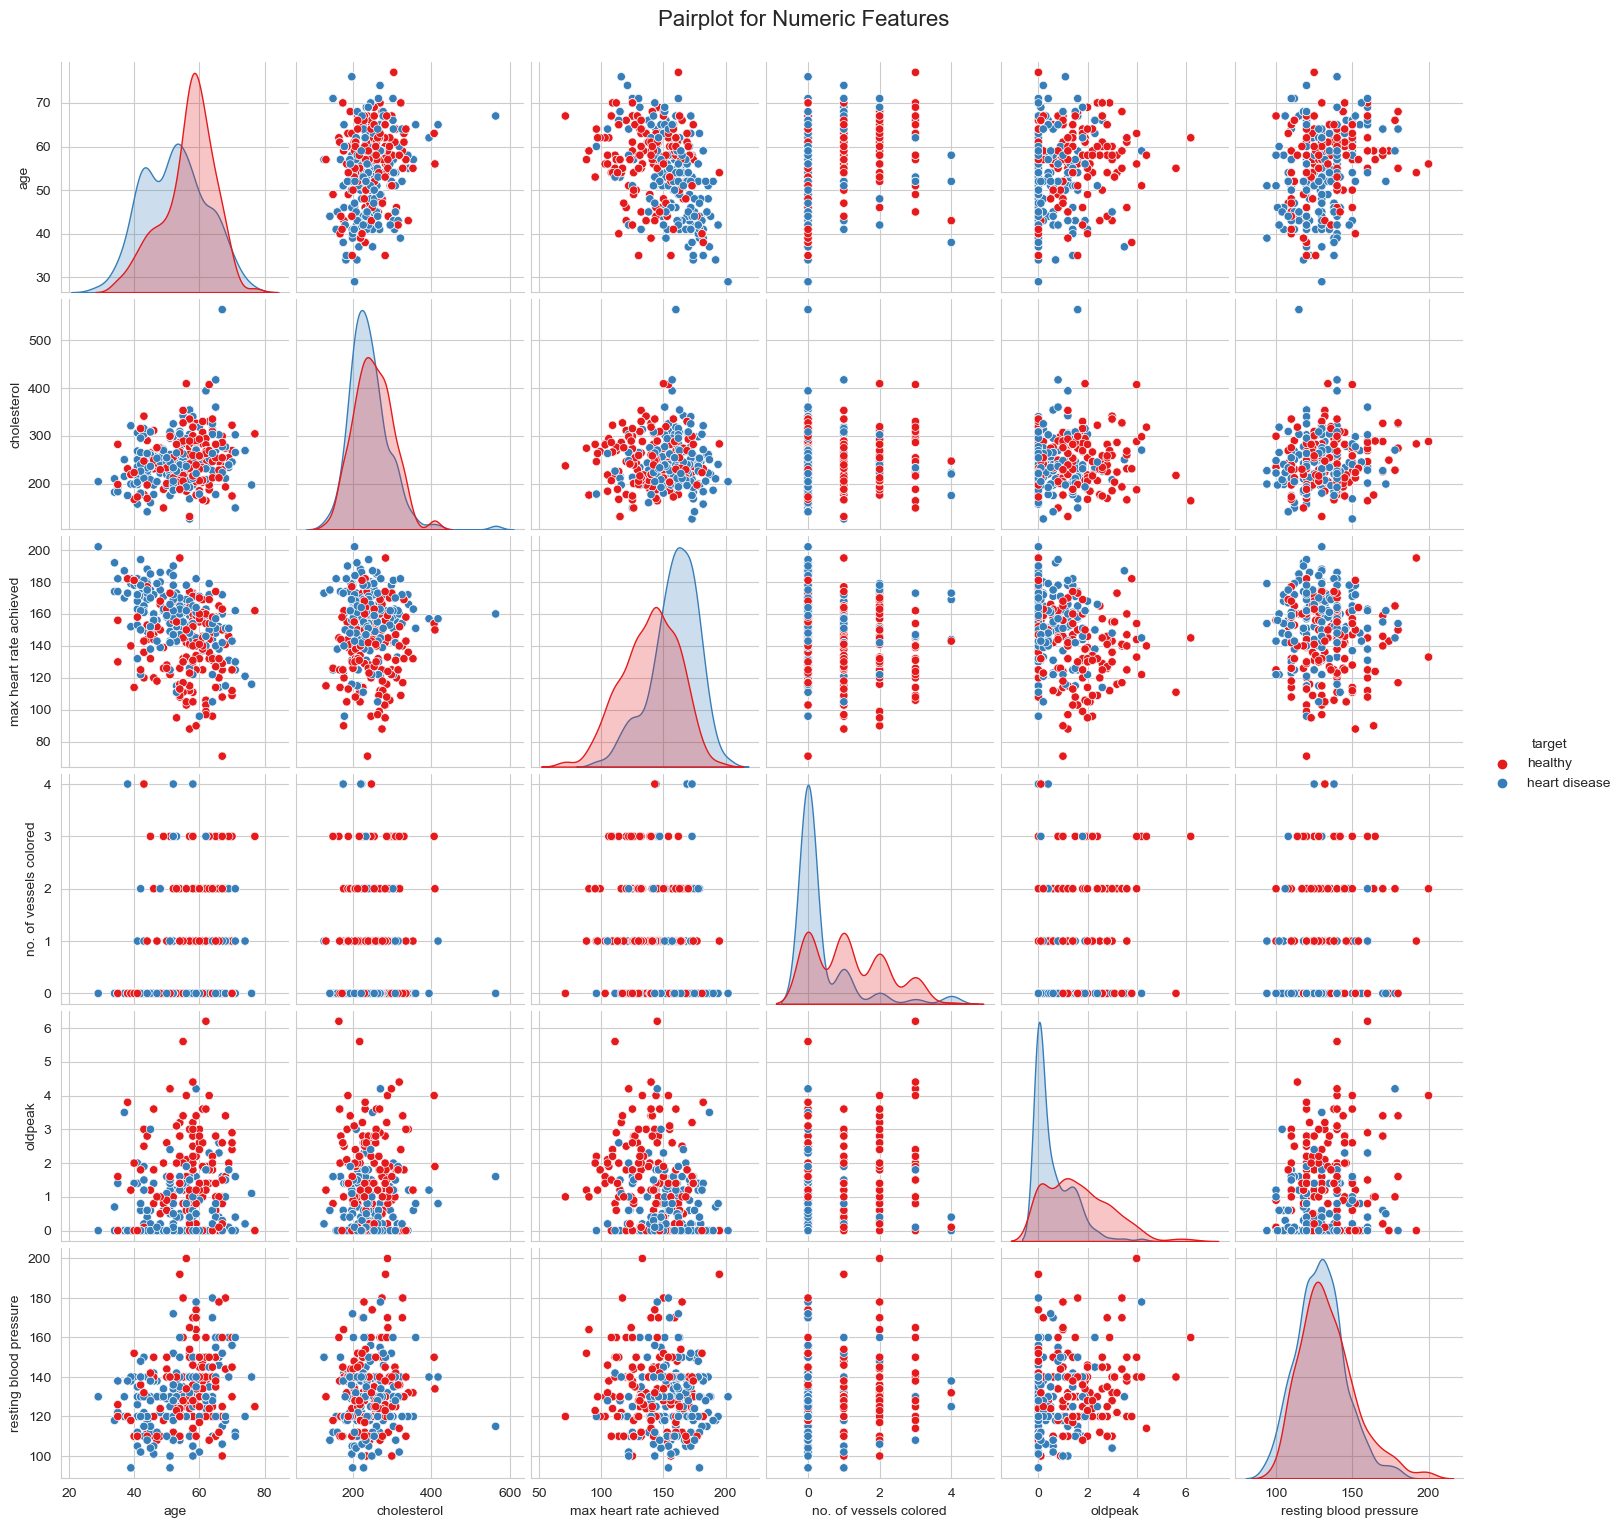

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numeric features from the dataset
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns

# Pairplot for numeric features, with hue based on the target
sns.pairplot(data[numeric_features.union(['target'])], hue='target', palette='Set1', diag_kind='kde')

# Adjusting plot title and layout
plt.suptitle('Pairplot for Numeric Features', y=1.02, fontsize=16)
plt.show()


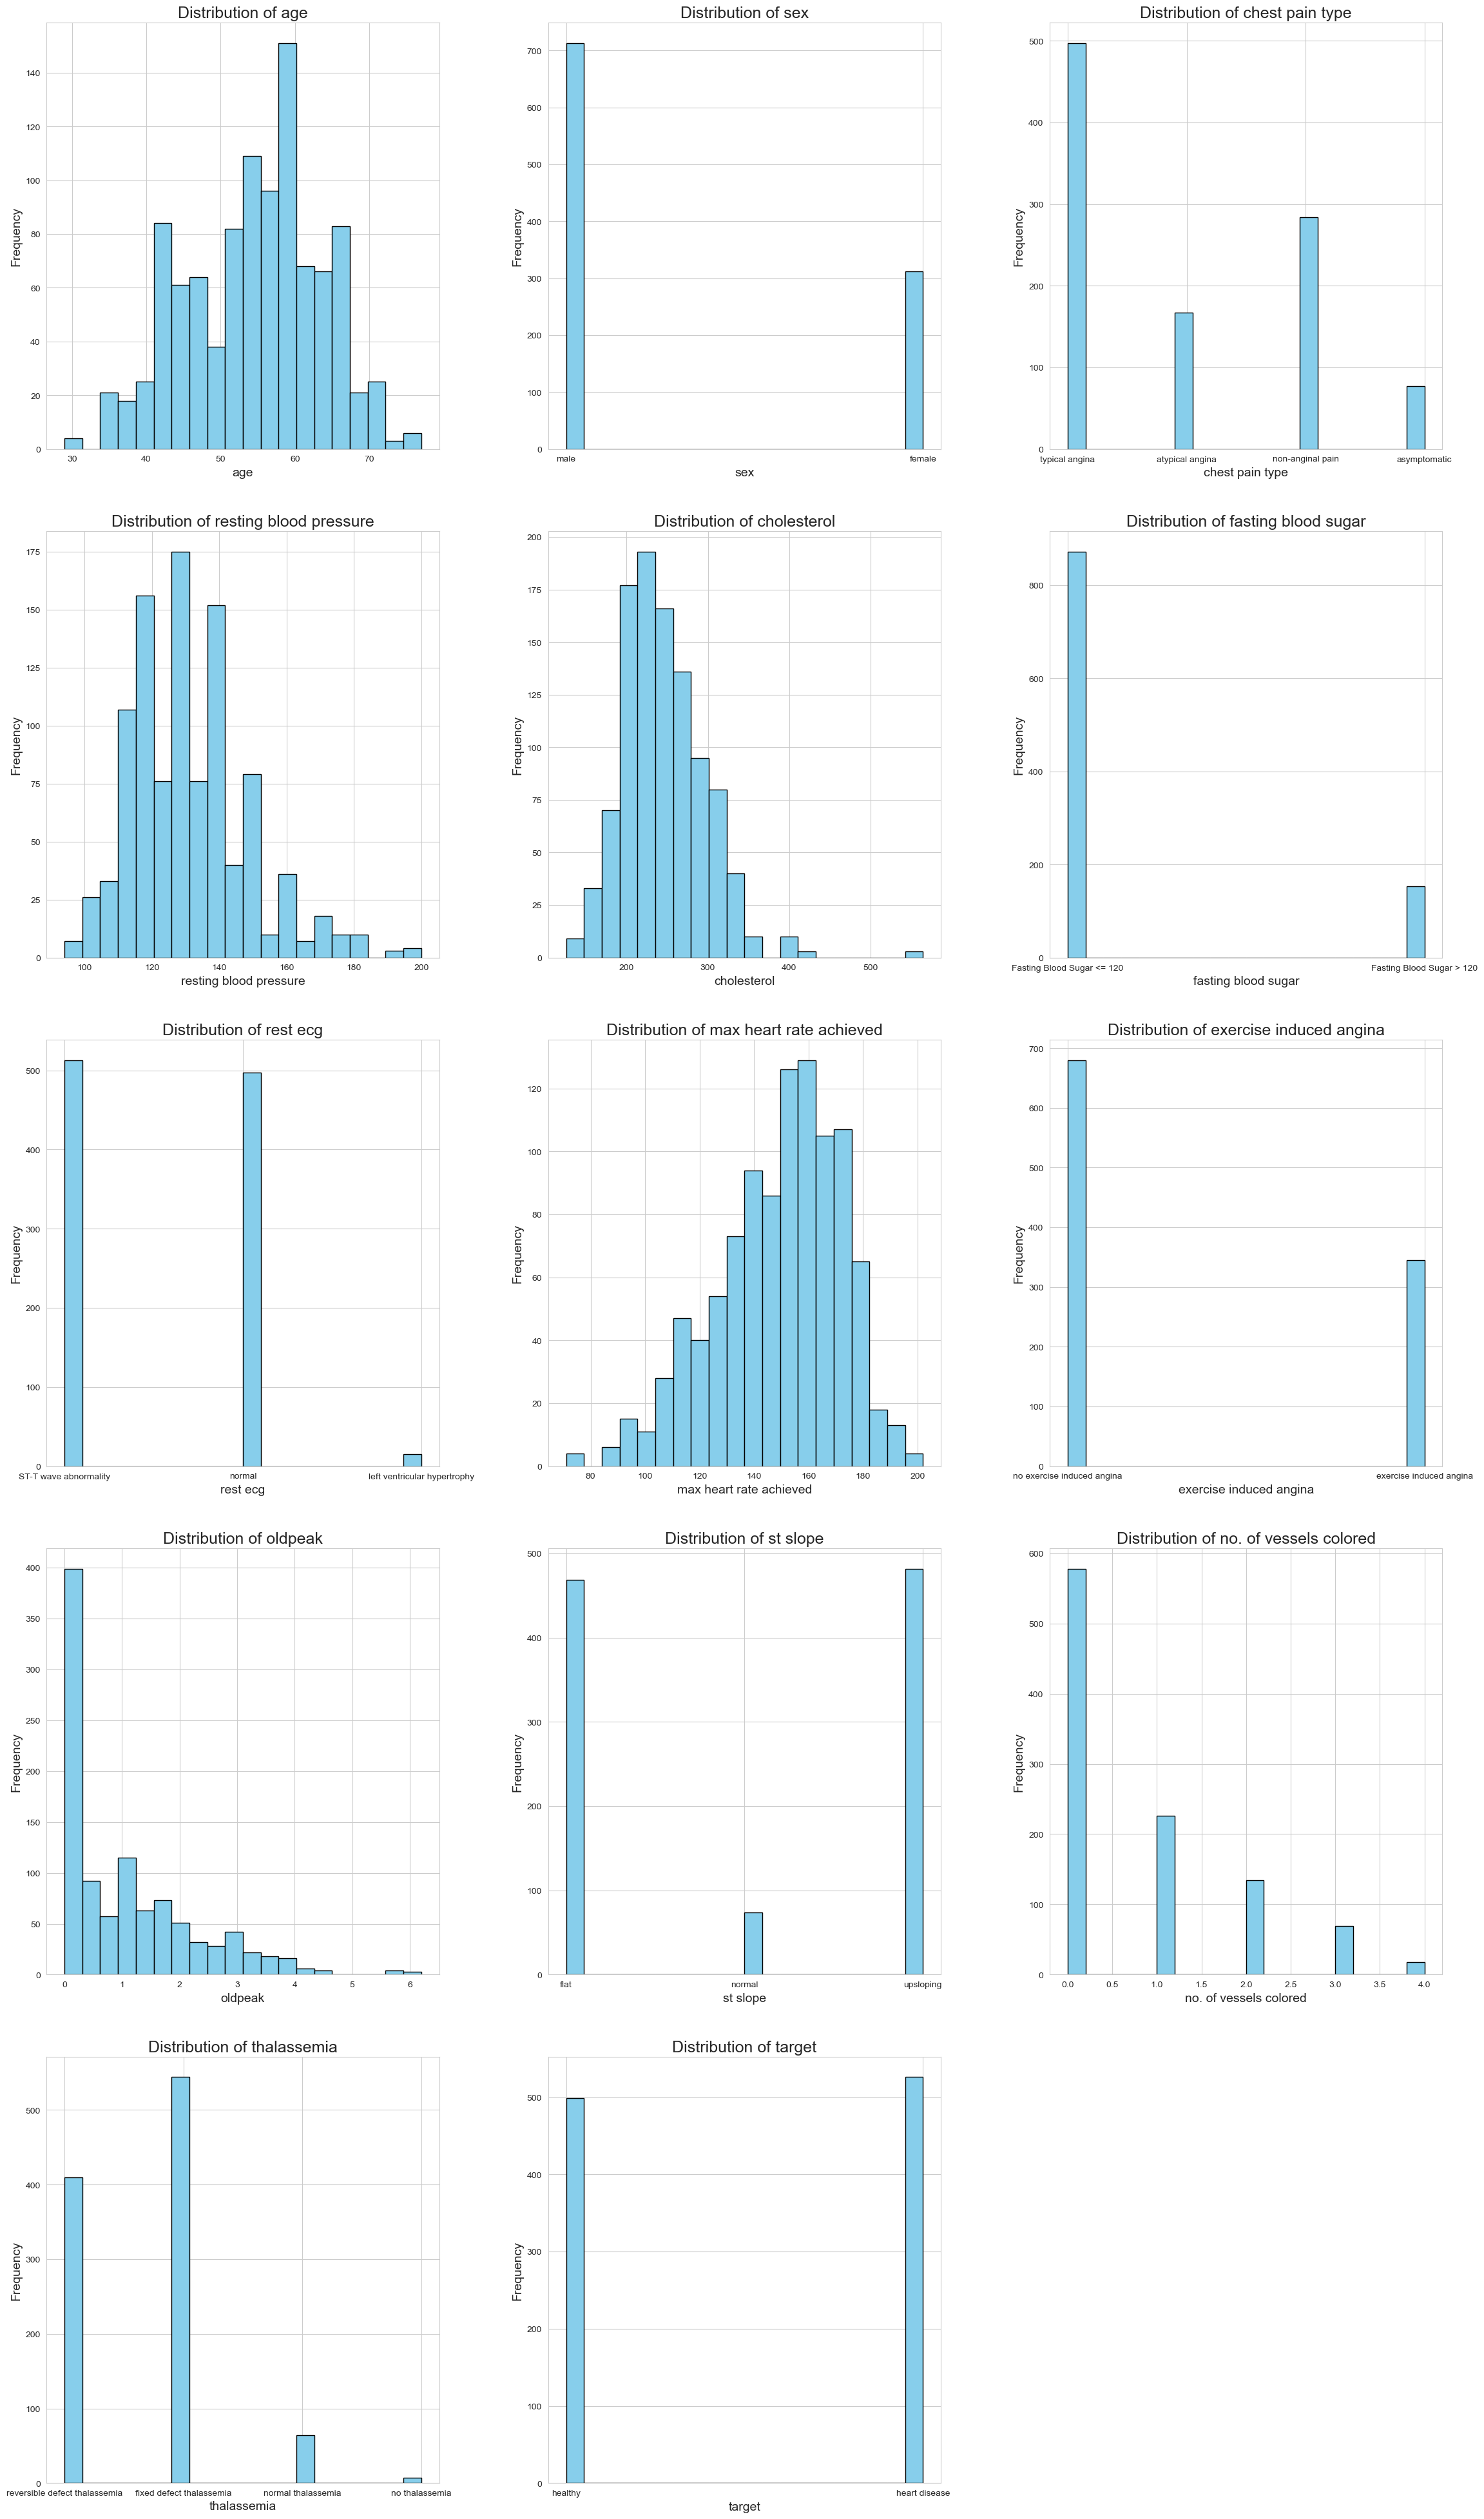

In [15]:
import matplotlib.pyplot as plt

# List of features based on your column names
features = [
    'age', 'sex', 'chest pain type', 'resting blood pressure', 'cholesterol',
    'fasting blood sugar', 'rest ecg', 'max heart rate achieved',
    'exercise induced angina', 'oldpeak', 'st slope', 
    'no. of vessels colored', 'thalassemia', 'target'
]

# Updated dimensions for even larger plots
n_features = len(features)
n_cols = 3  # Fewer columns for larger individual plots
n_rows = -(-n_features // n_cols)  # Calculate the number of rows needed

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(24, n_rows * 8))  # Larger figure size
axes = axes.flatten()

# Loop through features and create histograms
for i, feature in enumerate(features):
    ax = axes[i]
    data[feature].hist(ax=ax, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {feature}', fontsize=18)  # Larger title font size
    ax.set_xlabel(feature, fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

# Turn off any unused subplots
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.tight_layout(pad=4.0)  # Increased padding for more clarity
plt.show()


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your dataset (replace 'data' with your actual dataset)
# Example: data = pd.read_csv("your_data.csv")

# Handle categorical columns by label encoding
categorical_columns = ['sex', 'chest pain type', 'fasting blood sugar', 'rest ecg', 
                       'exercise induced angina', 'st slope', 'no. of vessels colored', 'thalassemia']  # Replace with actual categorical columns

label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

X = data.drop('target', axis=1)  # Features (everything except the target column)
y = data['target']  # Target variable (the column to predict)

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardize the features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Support Vector Machine classifier with default parameters
svc = SVC(kernel='rbf', C=1.0, gamma='scale')  # Adjust parameters if needed

# Train the model
svc.fit(X_train_scaled, y_train)

# Make predictions with the trained model
y_pred = svc.predict(X_test_scaled)

# Calculate metrics
acc = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='binary', pos_label="heart disease")  # Use the actual label string
recall = recall_score(y_test, y_pred, average='binary', pos_label="heart disease")  # Use the actual label string
f1 = f1_score(y_test, y_pred, average='binary', pos_label="heart disease")  # Use the actual label string

# Print the results
print("Accuracy for Support Vector Machine: ", acc)
print("Precision value for Support Vector Machine: ", precision)
print("Recall value for Support Vector Machine: ", recall)
print("F1 score for Support Vector Machine: ", f1)


Accuracy for Support Vector Machine:  89.26829268292683
Precision value for Support Vector Machine:  0.8521739130434782
Recall value for Support Vector Machine:  0.9514563106796117
F1 score for Support Vector Machine:  0.8990825688073394


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your dataset (replace 'data' with your actual dataset)
# Example: data = pd.read_csv("your_data.csv")

# Handle categorical columns by label encoding
categorical_columns = ['sex', 'chest pain type', 'fasting blood sugar', 'rest ecg', 
                       'exercise induced angina', 'st slope', 'no. of vessels colored', 'thalassemia']  # Replace with actual categorical columns

label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

X = data.drop('target', axis=1)  # Features (everything except the target column)
y = data['target']  # Target variable (the column to predict)

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardize the features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf' kernel
}

# Initialize the Support Vector Machine classifier
svc = SVC(probability=True)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters found by grid search
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test_scaled)

# Calculate metrics
acc = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='binary', pos_label='heart disease')  # Use the actual label string
recall = recall_score(y_test, y_pred, average='binary', pos_label='heart disease')  # Use the actual label string
f1 = f1_score(y_test, y_pred, average='binary', pos_label='heart disease')  # Use the actual label string

# Print the results
print("Accuracy for Support Vector Machine: ", acc)
print("Precision value for Support Vector Machine: ", precision)
print("Recall value for Support Vector Machine: ", recall)
print("F1 score for Support Vector Machine: ", f1)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy for Support Vector Machine:  96.58536585365853
Precision value for Support Vector Machine:  0.9615384615384616
Recall value for Support Vector Machine:  0.970873786407767
F1 score for Support Vector Machine:  0.966183574879227


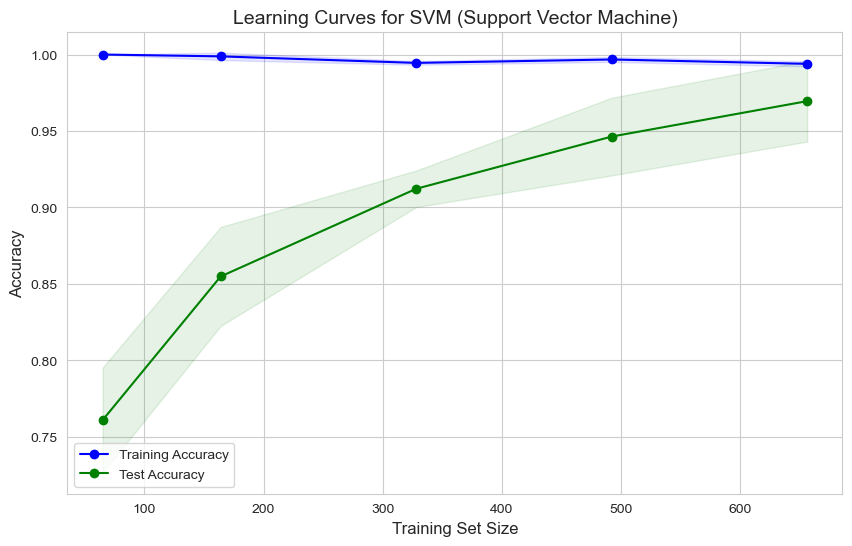

In [20]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Calculate learning curves
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train_scaled, y_train, cv=5, n_jobs=-1, train_sizes=[0.1, 0.25, 0.5, 0.75, 1.0])

# Calculate mean and std for train and test scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plot learning curves
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue', marker='o')
plt.plot(train_sizes, test_mean, label='Test Accuracy', color='green', marker='o')

# Fill between to show the variance
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)

# Labels and title
plt.title('Learning Curves for SVM (Support Vector Machine)', fontsize=14)
plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()

# Show plot
plt.show()


In [21]:
import shap

In [22]:
# Use shap.sample to take a random subset of your training data
background_data = shap.sample(X_train_scaled, 100)  # Take 100 random samples

# Create the SHAP explainer with the reduced background dataset
explainer = shap.KernelExplainer(best_model.predict_proba, background_data)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test_scaled[:100])


  0%|          | 0/100 [00:00<?, ?it/s]

<Figure size 1000x800 with 0 Axes>

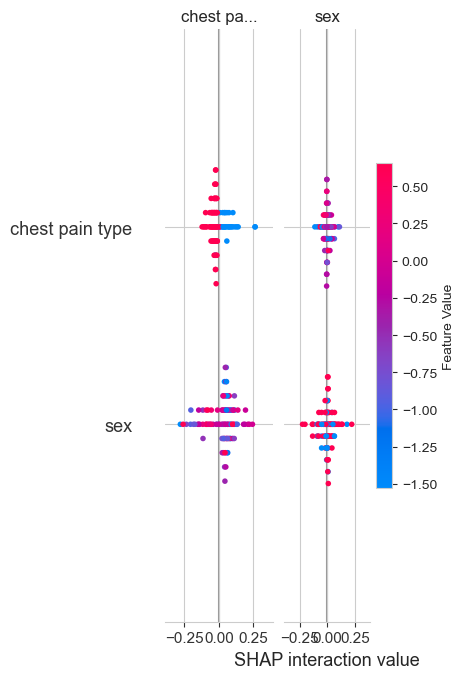

In [23]:
# Step 4: Create a custom SHAP summary plot with feature value bar on the right
plt.figure(figsize=(10, 8))  # Adjust the figure size
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=data.columns[1:], show=False)

# Add feature value bar on the right
plt.gca().invert_yaxis()  # Invert the y-axis to match the summary plot's style
plt.subplots_adjust(right=0.85)  # Adjust the plot area for extra space on the right
plt.colorbar(label="Feature Value")  # Add color bar for feature values

# Show the plot
plt.show()

Feature Importance (Permutation):
                    Feature  Importance
11   no. of vessels colored    0.099024
12              thalassemia    0.081951
9                   oldpeak    0.077561
5       fasting blood sugar    0.075122
2           chest pain type    0.074146
10                 st slope    0.053659
1                       sex    0.053171
8   exercise induced angina    0.053171
6                  rest ecg    0.047317
7   max heart rate achieved    0.038049
3    resting blood pressure    0.027317
0                       age    0.025366
4               cholesterol    0.021951


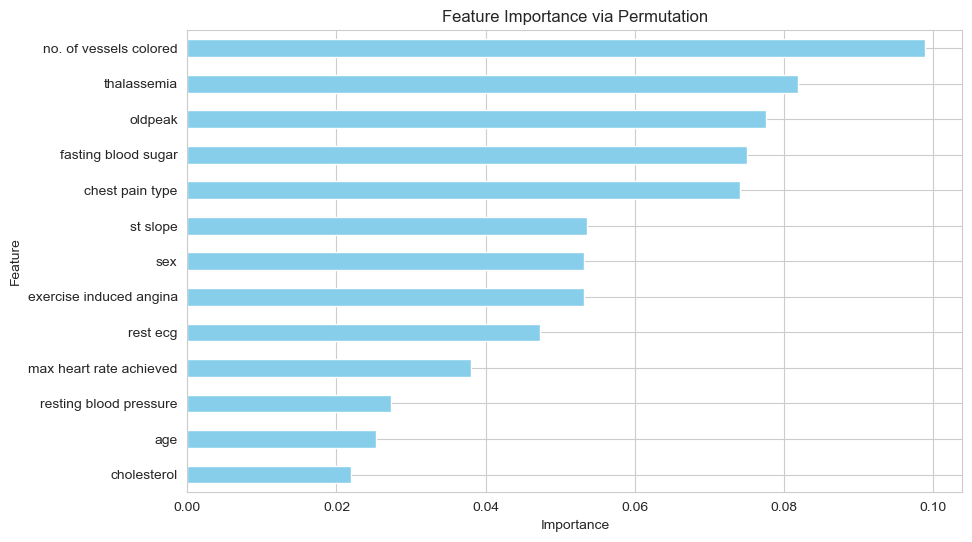

In [24]:
from sklearn.inspection import permutation_importance

# Perform permutation importance
results = permutation_importance(best_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Extract the importances and feature names
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': results.importances_mean
})

# Sort the features based on importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print("Feature Importance (Permutation):")
print(importance_df)

# Plot the feature importance
importance_df.plot.barh(x='Feature', y='Importance', legend=False, figsize=(10, 6), color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance via Permutation')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


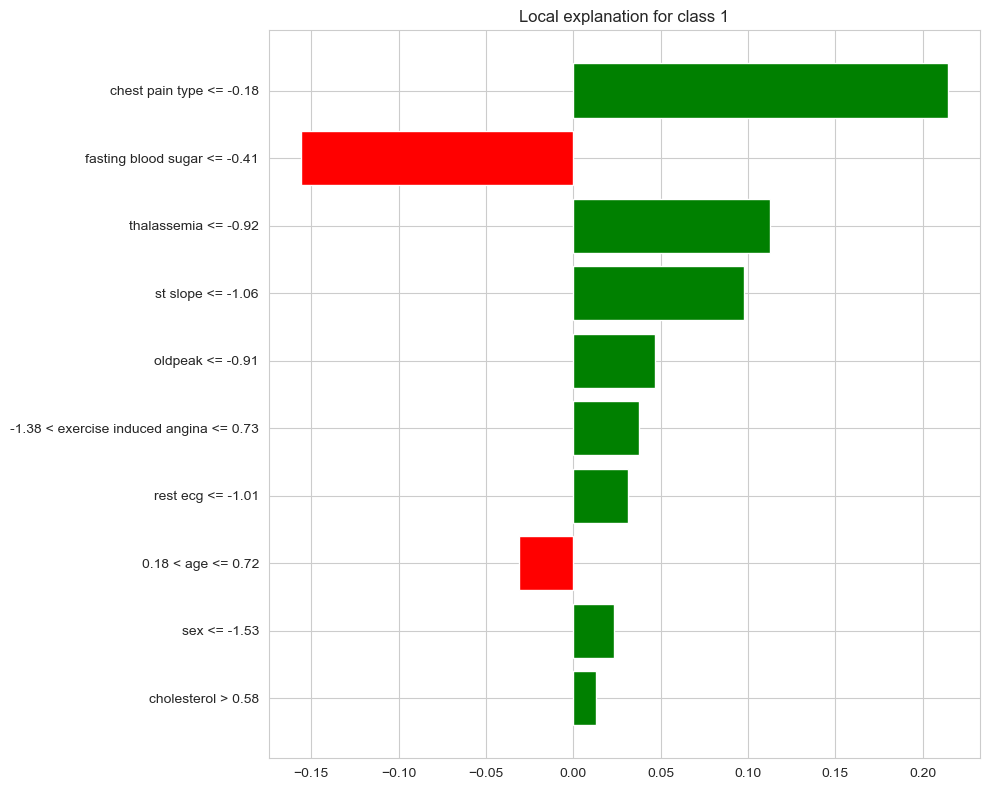

In [27]:
# LIME Explainability
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lime.lime_tabular
import matplotlib.pyplot as plt

# Create a LIME explainer for tabular data
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,  # Use scaled training data
    feature_names=X.columns,       # Feature names from your dataset
    class_names=[0, 1],            # Target classes (adjust to match your target variable)
    discretize_continuous=True     # Optional: Discretize continuous variables for better interpretability
)

# Select an instance to explain (for example, the 10th instance in the test set)
idx = 10
instance_to_explain = X_test_scaled[idx]

# Explain the prediction for the selected instance
explanation = explainer.explain_instance(instance_to_explain, best_model.predict_proba)

# Show the explanation in the notebook (no scrollbars)
explanation.show_in_notebook()

# Plot the explanation
# Use a larger figsize to ensure it fits properly
fig = explanation.as_pyplot_figure()
fig.set_size_inches(10, 8)  # Adjust the size (width, height)
plt.tight_layout()  # Ensures the plot fits within the figure area
plt.show()